# Bitly Data from 1.USA.gov

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import json
import seaborn as sns

In [2]:
!mkdir "../input/bitly_usagov"
!wget https://raw.githubusercontent.com/wesm/pydata-book/refs/heads/3rd-edition/datasets/bitly_usagov/example.txt -O "../input/bitly_usagov/example.txt"

A subdirectory or file ../input/bitly_usagov already exists.
--2025-09-14 20:34:44--  https://raw.githubusercontent.com/wesm/pydata-book/refs/heads/3rd-edition/datasets/bitly_usagov/example.txt
Loaded CA certificate '/usr/ssl/certs/ca-bundle.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8001::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598287 (1.5M) [text/plain]
Saving to: ‘../input/bitly_usagov/example.txt’

     0K .......... .......... .......... .......... ..........  3% 1.04M 1s
    50K .......... .......... .......... .......... ..........  6% 1.09M 1s
   100K .......... .......... .......... .......... ..........  9%  568K 2s
   150K .......... .......... .......... .......... .......... 12%  691K 2s
   200K .......... .......... .......... .......... .......... 16%  764K 2s
 

In [3]:
DATASET_FILE = "../input/bitly_usagov/example.txt"

In [4]:
with open(DATASET_FILE) as f:
    data = [json.loads(line) for line in f]

print(data[0])

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', 'c': 'US', 'nk': 1, 'tz': 'America/New_York', 'gr': 'MA', 'g': 'A6qOVH', 'h': 'wfLQtf', 'l': 'orofrog', 'al': 'en-US,en;q=0.8', 'hh': '1.usa.gov', 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991', 't': 1331923247, 'hc': 1331822918, 'cy': 'Danvers', 'll': [42.576698, -70.954903]}


In [5]:
# Findin the possible time zones
time_zones = [d["tz"] for d in data if "tz" in d]
time_zones = list(time_zones)
print(set(time_zones))

{'', 'Asia/Harbin', 'America/Los_Angeles', 'America/Puerto_Rico', 'Europe/Madrid', 'Europe/Helsinki', 'Asia/Kuala_Lumpur', 'America/Montreal', 'America/Santo_Domingo', 'America/Montevideo', 'Africa/Casablanca', 'Asia/Manila', 'America/Monterrey', 'Europe/Moscow', 'America/New_York', 'America/Chihuahua', 'Asia/Seoul', 'Africa/Johannesburg', 'America/Indianapolis', 'America/Argentina/Buenos_Aires', 'Europe/Sofia', 'Europe/Zurich', 'America/Vancouver', 'Europe/Berlin', 'America/Argentina/Mendoza', 'Asia/Calcutta', 'America/Winnipeg', 'America/Tegucigalpa', 'America/Sao_Paulo', 'Africa/Cairo', 'Europe/Athens', 'Asia/Nicosia', 'America/Mexico_City', 'Asia/Jakarta', 'Europe/Belgrade', 'America/Recife', 'America/Anchorage', 'America/Bogota', 'Europe/Lisbon', 'Europe/Bratislava', 'Pacific/Auckland', 'America/Chicago', 'Europe/Bucharest', 'America/Phoenix', 'Europe/Oslo', 'Europe/Skopje', 'Africa/Ceuta', 'America/Guayaquil', 'Asia/Pontianak', 'America/St_Kitts', 'Europe/Paris', 'Asia/Jerusalem'

In [6]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [7]:
counts = get_counts2(time_zones)
print(counts)
top_counts(counts)


defaultdict(<class 'int'>, {'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax'

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [8]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [9]:
# Convert records into a dataframe
frame = pd.DataFrame(data)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [10]:
tz_counts = frame["tz"].value_counts()
tz_counts.head(10)

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: count, dtype: int64

In [11]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head(10)

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: count, dtype: int64

<Axes: ylabel='tz'>

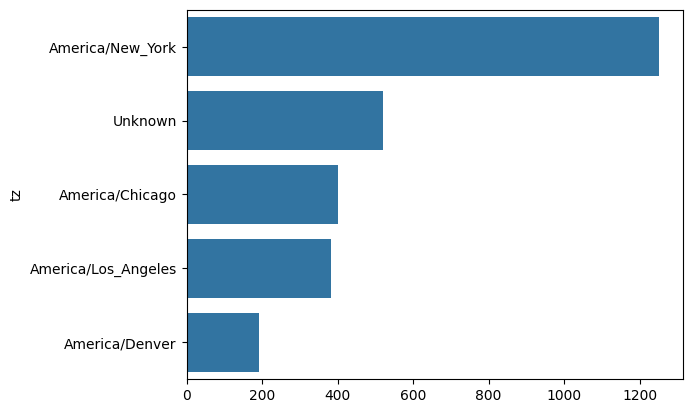

In [12]:
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

In [13]:
frame["a"][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [14]:
frame["a"][51][:50]  # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [15]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [16]:
cframe = frame[frame["a"].notna()].copy()
cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [17]:
by_tz_os = cframe.groupby(["tz", "os"])

In [18]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [19]:
indexer = agg_counts.sum("columns").argsort()
indexer[:10]

tz
                                   2
Africa/Cairo                       7
Africa/Casablanca                  5
Africa/Ceuta                       4
Africa/Johannesburg               14
Africa/Lusaka                     11
America/Anchorage                  9
America/Argentina/Buenos_Aires     8
America/Argentina/Cordoba         24
America/Argentina/Mendoza         26
dtype: int64

In [20]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [21]:
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [22]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<Axes: xlabel='total', ylabel='tz'>

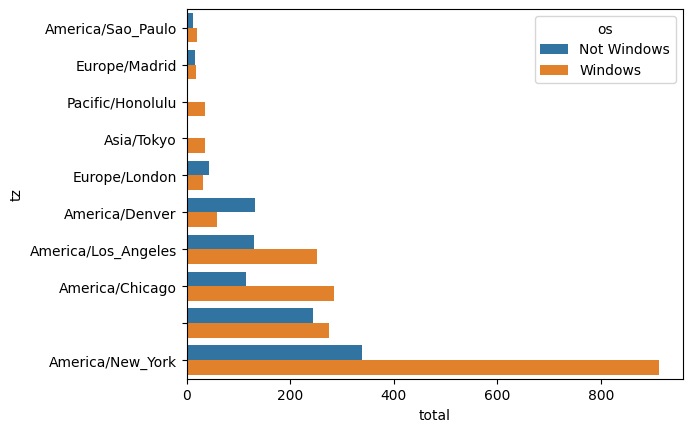

In [23]:
sns.barplot(x="total", y="tz", hue="os", data=count_subset)

C:\Users\purch\AppData\Local\Temp\ipykernel_32024\670666591.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


<Axes: xlabel='normed_total', ylabel='tz'>

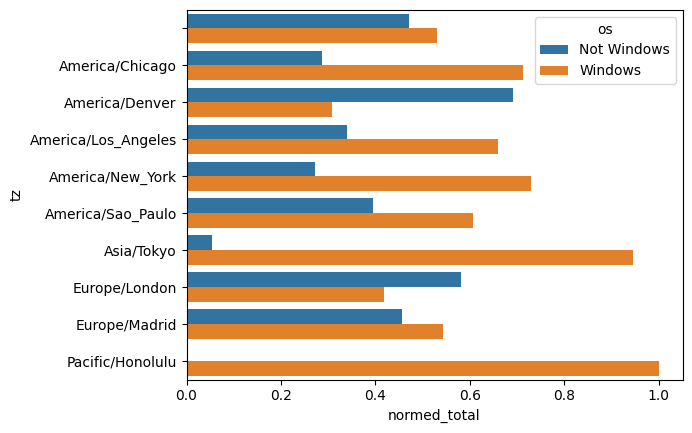

In [24]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)
sns.barplot(x="normed_total", y="tz", hue="os", data=results)

In [25]:
g = count_subset.groupby("tz")
g.head()

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


In [26]:
results2 = count_subset["total"] / g["total"].transform("sum")
results2.head()

0    0.393939
1    0.606061
2    0.457143
3    0.542857
4    0.000000
Name: total, dtype: float64